# *Recommendation System*

A recommender system, or a recommendation system, is a subclass of information filtering system that seeks to predict the “rating” or “preference” a user would give to an item.
We have two approaches of recommendation systems: Unpersonalized and Personalized. We will however dwell on the Personalized approach in our notebook.

The two types of personalized recommendation systems are content-based recommenders and collaborative filtering systems. We will delve into the application of both in our notebook.


#### *Problem Statement*
Our goal is to develop a movie recommendation system that can provide personalized recommendations to users based on their ratings of other movies. By leveraging the MovieLens dataset, we aim to create a model that can accurately identify the top 5 movie recommendations for each user.

#### *Business Objectives*
##### *Main objective*

Develop an accurate and efficient movie recommendation system that enhances user satisfaction by providing personalized recommendations aligned with their movie preferences.

##### *Specific Objectives*

1. What are the most popular movie genres?

2. What genres have the most ratings ?


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from collections import Counter
import os

BASE_DIR = os.getcwd()


### *Loading the data*
We will load our different datasets on our notebook and manipulate them.

#### *Links Dataset*

In [2]:
# Reading links file
links = pd.read_csv('Data_links.csv')

In [3]:
# Getting the information of our links dataset
links.info

<bound method DataFrame.info of       movieId   imdbId    tmdbId
0           1   114709     862.0
1           2   113497    8844.0
2           3   113228   15602.0
3           4   114885   31357.0
4           5   113041   11862.0
...       ...      ...       ...
9737   193581  5476944  432131.0
9738   193583  5914996  445030.0
9739   193585  6397426  479308.0
9740   193587  8391976  483455.0
9741   193609   101726   37891.0

[9742 rows x 3 columns]>

In [4]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
links.tail()

,movieId,imdbId,tmdbId
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0
9741,193609,101726,37891.0


In [6]:
# Finding the number of rows and columns in our dataset
links.shape

(9742, 3)

In [7]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


#### *Movies Dataset*

In [8]:
# Reading links file
movies = pd.read_csv('Data_movies.csv')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [12]:
movies.shape

(9742, 3)

In [13]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


This dataset contains attributes of the 9742 movies. There are 3 columns including the movie ID, their titles, and their genres. Genres are pipe-separated and are selected from 18 genres (Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western).

#### *Ratings Dataset*

In [14]:
# Reading links file
ratings = pd.read_csv('Data_ratings.csv')

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [16]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [18]:
ratings.shape

(100836, 4)

The ratings on the dataset have 100836 rows and 4 columns: which included userId, movieId, rating and timestamp.

In [19]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#### *Tags Dataset*

In [20]:
# Reading links file
tags = pd.read_csv('Data_tags.csv')

In [21]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [22]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [23]:
tags.tail()

,userId,movieId,tag,timestamp
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978
3682,610,168248,Heroic Bloodshed,1493844270


In [24]:
tags.shape

(3683, 4)

In [25]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


### *Dataset Cleaning*

We will first merge our movies dataset together with the ratings so we can use one variable to recommend the different movies to other users.

We will then head on to cleaning our dataset dropping columns, checking for any null values and checking for any duplicated values.

In [26]:
data = pd.merge(movies,ratings,on ='movieId')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [28]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [29]:
data.tail()

,movieId,title,genres,userId,rating,timestamp
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021
100835,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,331,4.0,1537157606


In [30]:
data.shape

(100836, 6)

In [31]:
data.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [32]:
# Dropping the timestamp column
data.drop('timestamp', axis=1, inplace=True)

In [33]:
# Confirming the drop of the column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [34]:
# Checking for null values
data.isna().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

In [35]:
# Checking for duplicated  values
data.duplicated().sum()

0

### *Data Exploration*

We will explore and visualize our new dataset to uncover different insights and also to identify areas or patterns to dig into.

#### *What are the most featured genres in the Movies dataset?*

In [36]:
# Concatenate all the genre strings into a single string
all_genres = '|'.join(movies['genres'].tolist())

# Split the concatenated string into individual words
words = all_genres.split('|')

# Count the occurrence of each word
word_count = Counter(words)

# Print the occurrence of each word
genre_lst = []
count_lst = []
for word, count in word_count.items():
    genre_lst.append(word)
    count_lst.append(count)
    # genre_count[word]=count
    
genre_count = pd.DataFrame({"genre": genre_lst, "count":count_lst})
genre_count

,genre,count
0,Adventure,1263
1,Animation,611
2,Children,664
3,Comedy,3756
4,Fantasy,779
5,Romance,1596
6,Drama,4361
7,Action,1828
8,Crime,1199
9,Thriller,1894


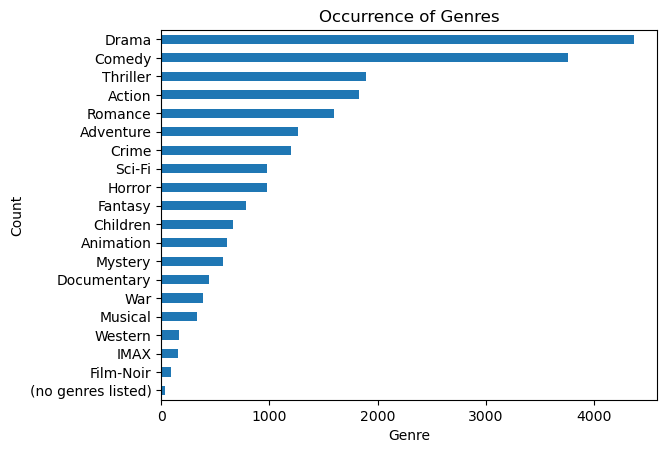

In [37]:
(genre_count
.sort_values(by=["count"], ascending=True)
.plot(x='genre', y='count', kind='barh', legend=False))

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Occurrence of Genres')

# Display the plot
plt.show()

Our image above depicts the occurence of genres with our top 5 being: Drama, Comedy, Thriller, Action and Romance. We can also see our least occuring genres in our dataset being Film-Noir, IMAX, Western and Musical just to mention a few.

In [38]:
# generate(all_genres)
wordcloud = WordCloud(width=800, height=400, background_color='white')

In [39]:
# creating a word cloud
wordcloud.generate(all_genres)

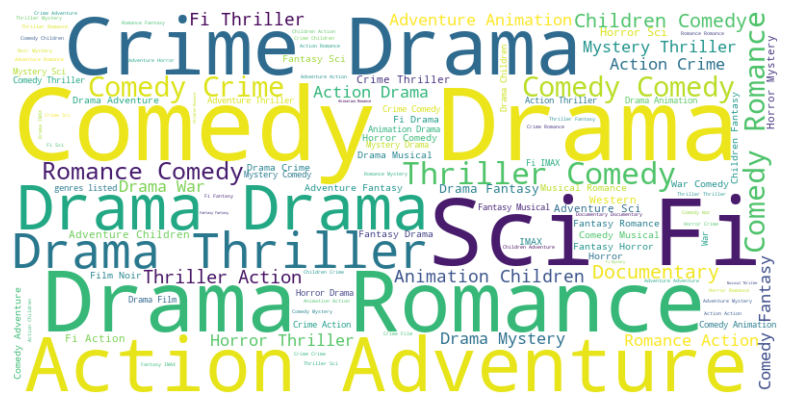

In [40]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the visulizations obtained above, we are able to see the popularity of the various genres our most occuring genres are drama, comedy, action, thriller and adventure etc.

#### *What genres have the most ratings?*

In [41]:
# Display movies with highest ratings
top_movies = data[["title","genres","rating"]].sort_values("rating", ascending=False).head(5)
top_movies

,title,genres,rating
56251,Eraserhead (1977),Drama|Horror,5.0
33888,Chasing Amy (1997),Comedy|Drama|Romance,5.0
20742,My Fair Lady (1964),Comedy|Drama|Musical|Romance,5.0
10168,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0
10169,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0


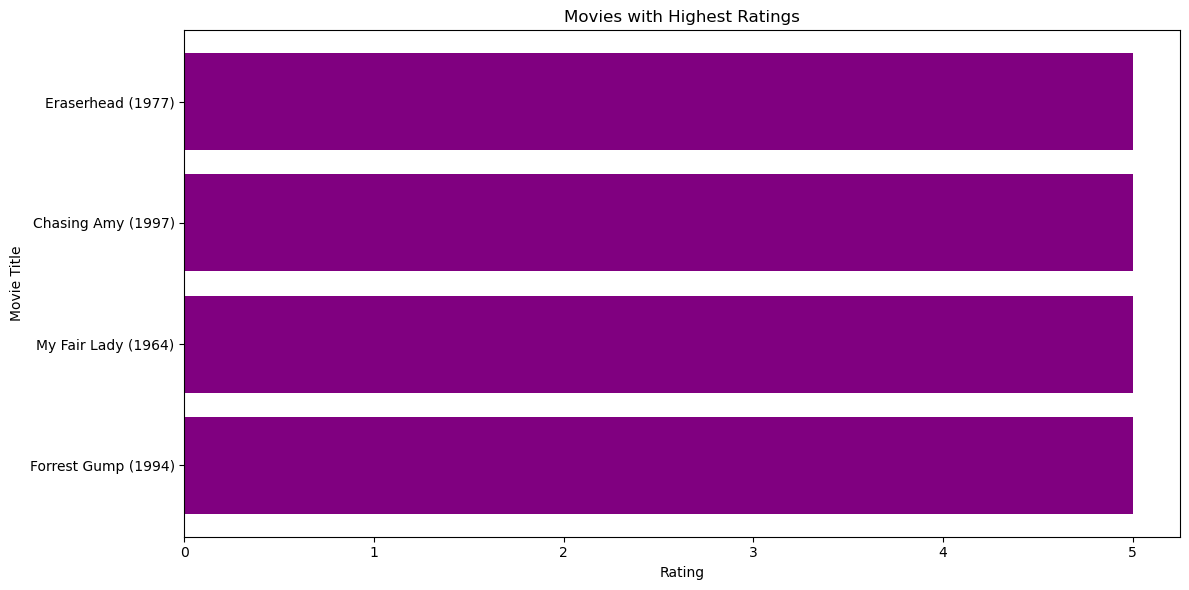

In [42]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_movies['title'], top_movies['rating'], color='purple')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.title('Movies with Highest Ratings')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest-rated movie at the top
plt.tight_layout()
plt.show()

In [43]:
# Creating a copy of the data dataset
movies_set = data.copy()

### *Recommendation systems*
There are two types of recommendation systems ;

1. Content-Based

2. Collaborative Filtering


#### *a) Content-Based*

Building a Content-Based Recommendation system that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre.

In [44]:
# Separating the genres into a string array
movies_set['genres'] = movies_set['genres'].str.split('|')
# Convert genres to string value
movies_set['genres'] = movies_set['genres'].fillna("").astype('str')

Using TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_set['genres'])
tfidf_matrix.shape

(100836, 177)

Using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies.

To measure the similarity of two
two genres, there are several natural distance measures we can use:
1. We could use Jaccard distance between the sets of words.
2. We could use the cosine distance between the sets treated as vectors. In our case will use the cosine similarity.

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

The movie genres are used to compute the cosine similarity matrix between all pairs of movies. This means that the recommendations are based on how similar the genres of two movies are.



In [47]:
# Create a bag of words representation of the movie genres
vectorizer = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
genres_bow = vectorizer.fit_transform(movies['genres'])
genres_bow

<9742x24 sparse matrix of type '<class 'numpy.int64'>'
	with 23219 stored elements in Compressed Sparse Row format>

In [48]:
# Compute the cosine similarity matrix between all pairs of movies based on their genres
cosine_sim = cosine_similarity(genres_bow)
cosine_sim

array([[1.        , 0.77459667, 0.31622777, ..., 0.        , 0.31622777,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.70710678],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        1.        ]])

In [49]:
movie_id = 3
movie_indices = pd.Series(movies.index, index=movies['movieId'])
similarity_scores = list(enumerate(cosine_sim[movie_indices[movie_id]]))

This code computes the cosine similarity scores between the movie with id 3 and all other movies in the dataset. The ‘enumerate’ function is used to add an index to each score so that we can sort them later.

In [50]:
similarity_scores.sort(key=lambda x: x[1], reverse=True)

This line sorts the similarity scores in descending order (i.e., from most similar to least similar) and returns a list of tuples where each tuple contains the index of a movie and its similarity score.

We then obtained the top 5 recommendations by taking the titles of the movies with the highest similarity scores.

In [51]:
# Get the top 5 movie recommendations for movie with id n
top_5_indices = [x[0] for x in similarity_scores[1:6]]
top_5_recommendations = movies.iloc[top_5_indices]['title'].tolist()
top_5_genres = movies.iloc[top_5_indices]['genres'].tolist()
for i in range(len(top_5_recommendations)):
    print(f"{i+1}. {top_5_recommendations[i]} ({top_5_genres[i]})")

1. Sabrina (1995) (Comedy|Romance)
2. Clueless (1995) (Comedy|Romance)
3. Two if by Sea (1996) (Comedy|Romance)
4. French Twist (Gazon maudit) (1995) (Comedy|Romance)
5. If Lucy Fell (1996) (Comedy|Romance)


From our above iteration we can see the genres recommended are in the Comedy|Romance genres.

#### *b) Collaborative Filtering*

The collaborative filtering recommender is entirely based on the past behavior and not on the context. It is based on the similarity in preferences, tastes and choices of two users.

It analyses how similar the tastes of one user is to another and makes recommendations on the basis of a particular feature.

These recommendations can be acquired using two broad categories:

a) Memory-Based Collaborative Filtering (Neighbourhood based).

b) Model-Based Collaborative filtering.

In [52]:
# Check for NaN values in the entire dataset
nan_values = data.isna().sum()

# Display the count of NaN values for each column
print(nan_values)

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64


Using a subset of the data available due to the the memory capacity ,taking a random sample of 20%.

In [53]:
# Randomly sample 20% of the combined dataset
small_data = movies_set.sample(frac=0.2)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20167 entries, 5312 to 59717
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  20167 non-null  int64  
 1   title    20167 non-null  object 
 2   genres   20167 non-null  object 
 3   userId   20167 non-null  int64  
 4   rating   20167 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 945.3+ KB
None


In [54]:
print('\Total no of ratings:',data.shape[0])
print('Total no of users:', len(np.unique(data.userId)))
print('Total no of movies:', len(np.unique(data.movieId)))

Total no of ratings: 100836
Total no of users: 610
Total no of movies: 9724


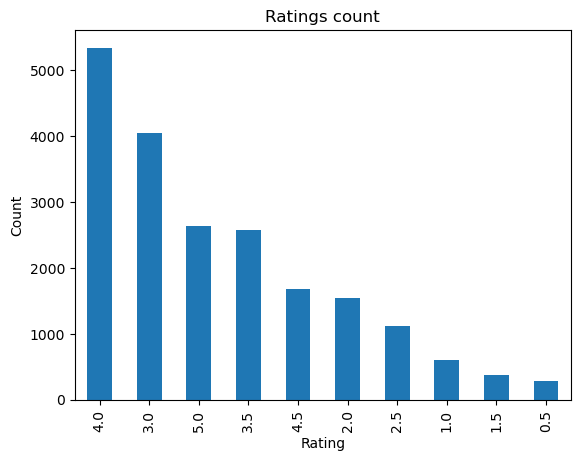

In [55]:
small_data['rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings count')
plt.show()

From our visual above we are able to deduce the different movie ratings against the movie count.

In [85]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [86]:
# Split into train and test set
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split

df = pd.DataFrame(small_data, columns=['userId', 'movieId', 'rating'])
reader = Reader()
data = Dataset.load_from_df(df, reader)
trainset, testset = train_test_split(data, test_size=0.20)

In [87]:
trainset

In [88]:
type(testset)

list

In [89]:
print(len(testset))
print(testset[0])

4034
(318, 86290, 4.0)


The 'trainset' still being in a 'suprise' specific data type means it has been optimized for computational efficiency and the test set is a standard python list.

## 1. Memory-Based Methods(Neighborhood-Based)

Surprise gives you a chance to try out multiple different types of collaborative filtering engines.

In [90]:
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine,msd,pearson
from surprise import accuracy
from surprise import KNNBasic

One of our first decisions is item-item similarity versus user-user similarity.

In a case where we have fewer items than users, it will be more efficient to calculate item-item similarity rather than user-user.

In [91]:
print("Number of users:",trainset.n_users, "\n")
print("Number of items:", trainset.n_items, "\n")

Number of users: 608 

Number of items: 4597 



From our dataset above we can see our number of users is less than that of the items. We know for the sake of computation time, its best to calculate the similarity between whichever number is fewer - which in our case is users.

In [92]:
#To train our model
sim_cos ={"name": "cosine", "user_based":True}
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Let's take a look at the similarity metrics of each of the items to one another by using the sim attribute of our fitted model.

In [93]:
basic.sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.96761727, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.96761727, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

We shall test our model on how well it performed below by obtaining the RSME (root mean square error)

In [96]:
predictions = basic.test(testset)
print(accuracy.rmse(predictions))

RMSE: 1.0843
1.0843162099473616


 As you can see, the model had an RMSE of about 1.0843, meaning that it was off by roughly 1 point for each guess it made for ratings.

 An RSME value of zero would indicate a perfect fit to our data.
 Let's try with a different similarity metric (Pearson correlation) and evaluate our RMSE and see if our accuracy will improve.

In [66]:
# Using a different similarity metrics (Pearson correlation)
sim_pearson = {"name":"pearson","user_based":True}
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(trainset)
predictions = basic_pearson.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0889
1.0888849220460561


Pearson correlation seems to have performed worse than cosine similarity with an RSME of 1.0889 compared to our previous one that was 1.0843 respectively. We can go ahead and use Cosine similarity as our similarity metric of choice.

KNN with Means(basic KNN model) takes into account the mean rating of each user or item depending on whether you are performing user-user or item-item similarities.

In [97]:
# KNN with Means
sim_pearson = {'name':'pearson','user_based':True}
knn_means = knns.KNNWithMeans(sim_options = sim_pearson)
knn_means.fit(trainset)
predictions = knn_means.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0406
1.0405518614108424


KNN Baseline model is more advanced as it adds in a bias term that is calculated by way of minimizing a cost function

In [68]:
sim_pearson = {'name':'pearson','user-based':True}
knn_baseline = knns.KNNBaseline(sim_options=sim_pearson)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9884
0.9884006342992033


KNN Baseline model is more advanced as it adds in a bias term that is calculated by way of minimizing a cost function.
Even better! Now let's see if we can get some insight by applying some matrix factorization techniques!


## 2. Model-Based Methods(Matrix factorization)

When SVD is calculated for recommendation systems, it only takes into account the rated values, ignoring whatever items have not been rated by users.

In [69]:

from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[20, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],'reg_all': [0.4, 0.6]}
gs_model = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
gs_model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   12.5s finished


The optimal parameters used are :

{'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}

In [70]:
# Using the optimal parameters from above
svd = SVD(n_factors=100, n_epochs=10, lr_all=0.005, reg_all=0.4)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.9223
0.9223003891789371


Using SVD we get our RSME as 0.9223.

In order to get predicted ratings for a given user and item, all that's needed are the userId and movieId for which you want to make a prediction on.

In [71]:
# Here we are making a prediction of user 42 and item 20 using the SVD we just fit
user_prediction = svd.predict("42","20")
user_prediction

Prediction(uid='42', iid='20', r_ui=None, est=3.484255873055228, details={'was_impossible': False})

Here, we're going to access the estimated rating for user 42 on item 20.

In [72]:
user_prediction[3]

3.484255873055228

Now using our predicted ratings for a given user, we are going to create a list of top 10 movies that we could recommend to that particular user.

In [98]:
# Load the ratings dataset using the Surprise library
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('Data_ratings.csv', reader=reader)
data

Our dataset will be in Surprise format.

Having trained our model from above using the 'svd.fit(trainset)' which is also in the format of an Surprise, we are going to use svd in our case as shown below.

In [99]:
# Get the user ratings for user with id 'n'
user_id = 3
user_ratings = data.raw_ratings

Here we will have a chance to look at the movies that that particular user did not rate so as to be able to make an informed judjement on what's best to recommend to them.

In [100]:
# Get all the movies that user with id 'n' has not rated yet
user_unrated_movies = movies[~movies['movieId'].isin([rating[1] for rating in user_ratings if rating[0] == user_id])]

In [101]:
# Predict the ratings for all the unrated movies and sort them in descending order
user_unrated_movies['predicted_rating'] = user_unrated_movies['movieId'].apply(lambda x: svd.predict(user_id, x).est)
user_unrated_movies.sort_values('predicted_rating', ascending=False, inplace=True)

In [106]:
# Get the top 5 movie recommendations for user with id n
top_5_recommendations = user_unrated_movies.head()
top_5_recommendations

,movieId,title,genres,predicted_rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,3.963193
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,3.797867
461,527,Schindler's List (1993),Drama|War,3.787157
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,3.728293
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,3.688113


Thats it, we can be able to recommend the above top 5 movies to our user noting that they all had almost the same predited rating thus hoping they would be vaible to that user's preferences.

## Conclusion:

By leveraging both content-based and collaborative filtering techniques, we were able to develop a model that provided personalised movie recommendations to users based on their ratings on other movies and genres of preference.

Using the collaborative filtering approach specifically user-based, we identified similar users based on their movie ratings and genres which  enabled us to generate recommendations based on the preference of users with similar tastes.

We utilized the surprise library which provided a framework for loading and preprocessing the data, splitting it into training and testing sets and implementing the algorithm. Our model was trained using evaluation metrics: RMSE to access its perfomance by measuring the accuracy, we ensured that our recommendations were reliable to our users. 

By offering the top 5 movie recommendations to the users, we were able to enhance the movie viewage and experience and allow them to discover new films that intrigued them.

## Recommendations:

1. Use of a hybrid recommendation systems that combines content-based and collaborative filtering, hence more accurate recommendations.
2. Provide a diverse selection of highly popular films that users may enjoy based on the ratings of other movies. 